In [54]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
data_path = "data/intern_task.csv"

In [56]:
df = pd.read_csv(data_path)
df.head(10)

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000
5,1,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.200000,0.974819,22.936731,0.333333,0.033233,0.000093,28.0,9.333333
6,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,3.0,16.200000,0.000000,0.945281,18.240926,0.000000,0.013008,0.000023,5.0,1.666667
7,0,10,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,0,10,2.0,0.0,1.0,0.0,2.0,0.666667,0.0,0.333333,...,218.0,55.069946,0.000000,0.448807,4.695805,0.000000,0.002153,0.000002,5.0,1.666667
9,0,10,3.0,0.0,0.0,0.0,3.0,1.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.975608,0.000000,0.000000,0.021583,0.000040,9.0,3.000000


In [57]:
df.isna().sum()
# df.isna().sum().sum()

rank           0
query_id       0
feature_0      0
feature_1      0
feature_2      0
              ..
feature_139    0
feature_140    0
feature_141    0
feature_142    0
feature_143    0
Length: 146, dtype: int64

Отлично, пропущенных значений нет.

## Visualization

1) Создам pdf с гистограммами распределения всех фичей
2) Посмотрим описания и корреляции фичей

### 1) Histograms

In [58]:
from matplotlib.backends.backend_pdf import PdfPages

pdf_path = "images/histograms.pdf"

with PdfPages(pdf_path) as pdf:
    features_per_page = 10

    total_features = [col for col in df.columns if "feature_" in col]
    total_pages = (len(total_features) + features_per_page - 1) // features_per_page

    for page in range(total_pages):
        fig, axes = plt.subplots(nrows=features_per_page, ncols=1, figsize=(10, 20))
        
        for i in range(features_per_page):
            feature_index = page * features_per_page + i
            if feature_index < len(total_features):
                ax = axes[i]
                feature = total_features[feature_index]
                ax.hist(df[feature], bins=30, color="skyblue", edgecolor="black")
                ax.set_title(f"Гистограмма {feature}")
                ax.set_xlabel("Значения")
                ax.set_ylabel("Частота")
            else:
                axes[i].axis("off")
        
        plt.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

### 2) Descriptions and Correlations

In [59]:
describe = df.describe()
correlation_matrix = df.corr()

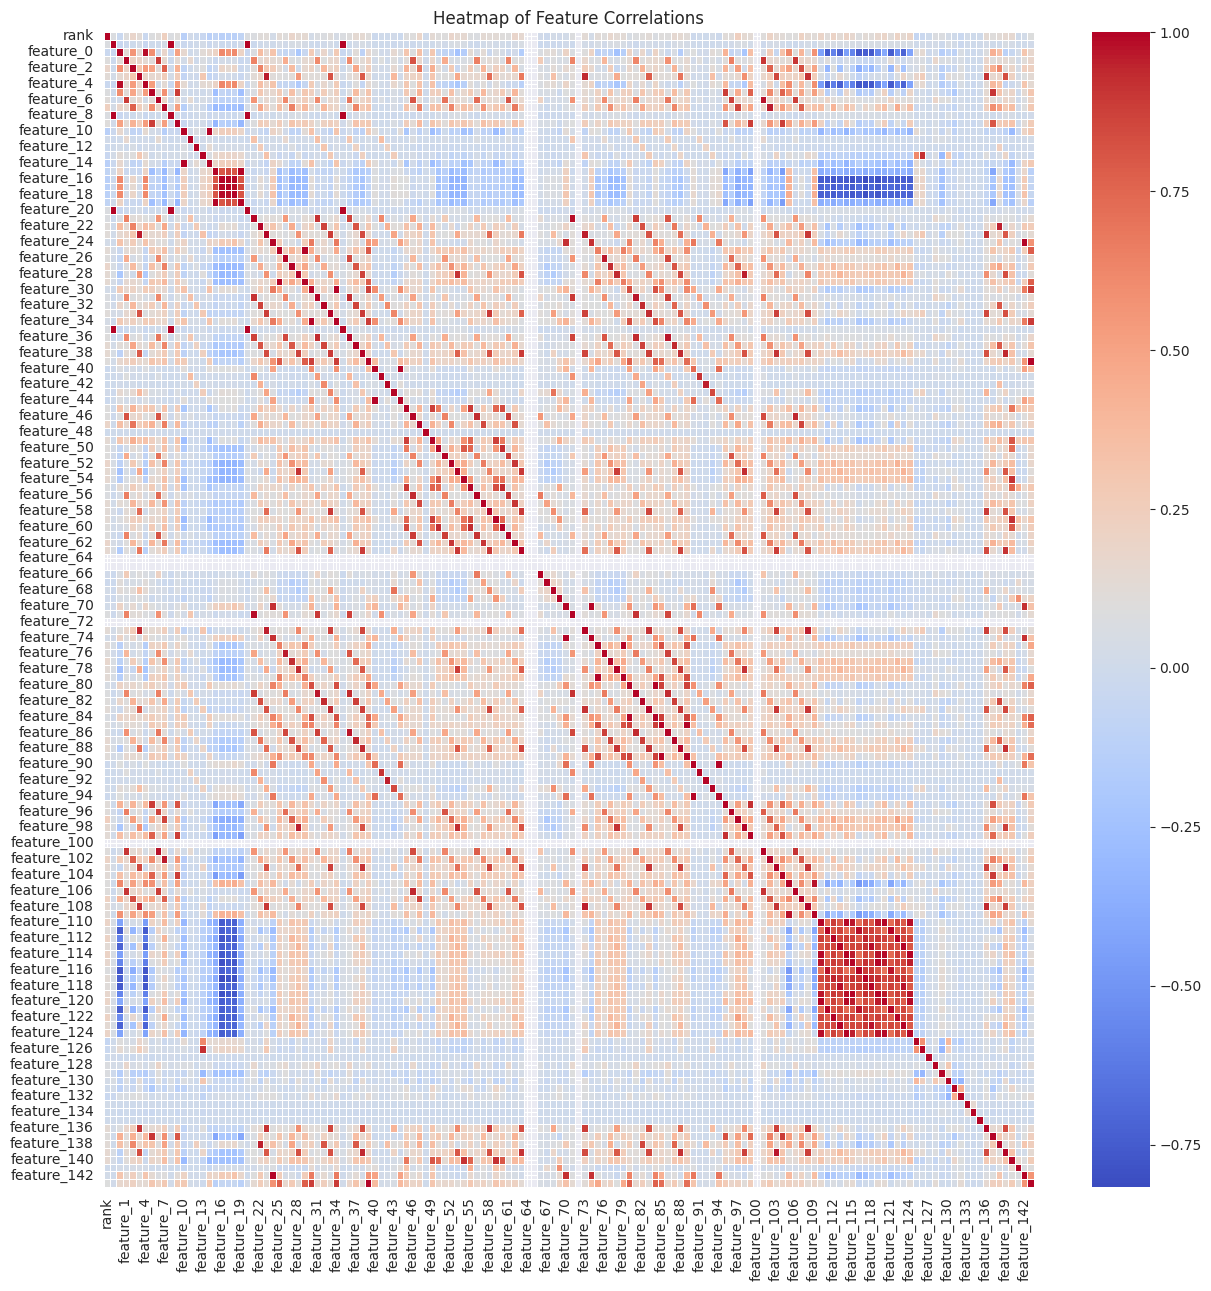

In [60]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".1f", linewidths=.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

In [61]:
describe

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
count,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,...,2.352580e+05,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000
mean,0.677869,14828.413401,1.911960,0.206233,1.189847,0.550272,1.960082,0.803964,0.097557,0.541174,...,4.763432e+02,1.046698e+04,0.070299,0.740710,11.067947,0.281747,0.027033,0.000269,22.457910,9.560379
std,0.830033,8193.945170,1.237374,0.579089,1.037233,0.790947,1.203534,0.339955,0.266035,0.419973,...,1.954840e+04,2.649584e+06,0.100721,0.352800,15.336861,0.392089,0.033351,0.002088,63.708018,14.347378
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8215.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.620522,0.000000,0.000000,0.006703,0.000000,4.000000,2.000000
50%,0.000000,14935.000000,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.500000,...,0.000000e+00,0.000000e+00,0.000000,0.926779,9.448900,0.000000,0.017761,0.000008,12.000000,5.500000
75%,1.000000,21580.000000,3.000000,0.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,...,1.000000e+00,4.000000e-01,0.142857,0.999613,16.146733,0.500000,0.034954,0.000109,28.000000,12.000000
max,4.000000,29995.000000,31.000000,18.000000,27.000000,9.000000,31.000000,1.000000,1.000000,1.000000,...,1.731553e+06,8.000000e+08,0.818182,1.000000,2506.799764,1.000000,0.711261,0.250000,15074.000000,1552.000000


### Наблюдения:
1) Видно, что есть константы (например фича 100)
2) Можно заметить странное распределение в фиче 8. Думаю, ее просто равномерно сгенерировали от 0 до 1000.
3) Уж слишком нормальное распределение у фичи 48 :) Еще красивые распределения есть, например 59. 
4) Есть коллинеарные фичи.
5) Разряженность данных: есть фичи, у которых большое кол-во нулей.

Фичи которые соответствуют пунктам 1 и 2 можно сразу удалить.

## Data Cleaning

### 1) Removing Constant Columns

In [62]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=constant_columns, inplace=True)

print(constant_columns)

['feature_64', 'feature_65', 'feature_72', 'feature_100']


### 2) Removing: feature_8, feature_20, feature_35
Найдём подобные 8-й фиче колонки, и посмотрим их распределение

In [63]:
f_8_corr = correlation_matrix["feature_8"]
cols = f_8_corr[f_8_corr.abs() > 0.99].keys()
describe[cols]

,query_id,feature_8,feature_20,feature_35
count,235258.000000,235258.000000,235258.000000,2.352580e+05
mean,14828.413401,500.000000,0.500000,1.000000e+06
std,8193.945170,288.676975,0.288677,5.773540e+05
min,10.000000,0.000000,0.000000,0.000000e+00
25%,8215.000000,250.000000,0.250000,5.000000e+05
50%,14935.000000,500.000000,0.500000,1.000000e+06
75%,21580.000000,750.000000,0.750000,1.500000e+06
max,29995.000000,1000.000000,1.000000,2.000000e+06


Видно и в histograms.pdf, и по корреляции с query_id, что фичи 8, 20 и 35 - это просто сгенерированные значения.
Удаляем их.

In [64]:
df.drop(columns=["feature_8", "feature_20", "feature_35"], inplace=True)

## Data Exploration

### 3) Feature 48
Нормальное распределение, конечно, распространено в природе, но в данном случае, я думаю, что это искусственно сгенерированная фича, уж слишком красивый у нее график (с очень незначительными выбросами), и отсутствует корреляция с другими фичами.

Это не повод сразу её удалять, просто будем держать в голове, что с фичами дадасета нужно еще дополнительно порабоать.

In [65]:
(correlation_matrix["feature_48"].abs() > 0.01).sum()
# >>> 1  - кореллирует только сама с собой

1

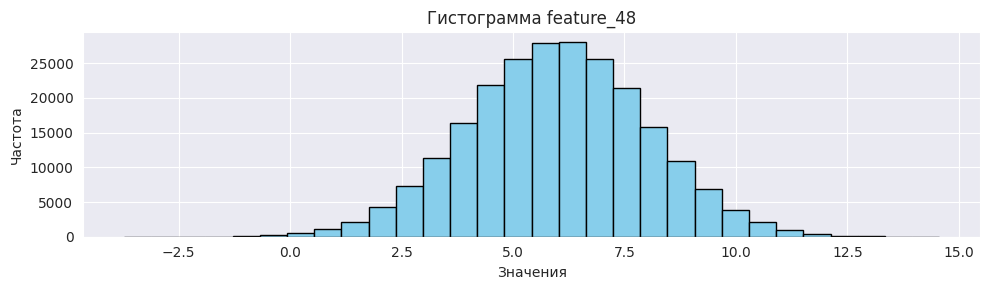

In [66]:
fig, ax = plt.subplots(figsize=(10, 3))

ax.hist(df["feature_48"], bins=30, color="skyblue", edgecolor="black")
ax.set_title("Гистограмма feature_48")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.tight_layout()
plt.show()

### 4) Collinear Features
Коллинеарность - это плохо. Даже если мы используем архитектуры моделей, которые устойчивы к переобучению из-за коллинеарности, например мы применяем методы регуляризации или испоьлзуем алгоритмы на основе деревьев - лишние фичи требуют больше вычислительных ресурсов.

In [67]:
describe = df.describe()
correlation_matrix = df.corr()

In [68]:
high_corr_pairs = correlation_matrix.stack().reset_index()
high_corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]
high_corr_pairs = high_corr_pairs[(high_corr_pairs["Feature1"] != high_corr_pairs["Feature2"]) & 
                                  (abs(high_corr_pairs["Correlation"]) > 0.95)]

high_corr_pairs = high_corr_pairs.loc[high_corr_pairs["Feature1"] < high_corr_pairs["Feature2"]]
high_corr_pairs

,Feature1,Feature2,Correlation
284,feature_0,feature_4,0.979494
1544,feature_10,feature_14,0.997014
2244,feature_15,feature_19,0.999892
2381,feature_16,feature_17,0.991783
2382,feature_16,feature_18,0.989091
2521,feature_17,feature_18,0.985465
2987,feature_21,feature_71,0.982731
3202,feature_23,feature_3,0.960205
3266,feature_23,feature_73,0.954548
3504,feature_25,feature_29,0.996002


In [69]:
def plot_feature_histograms(df, features, bins=30, figsize=(12, 2)):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)    
    colors = ["skyblue", "red"]
    
    for i, feature in enumerate(features):
        axes[i].hist(df[feature], bins=bins, color=colors[i], edgecolor="black")
        axes[i].set_title(f"{feature}")
        axes[i].set_xlabel("Values")
        axes[i].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

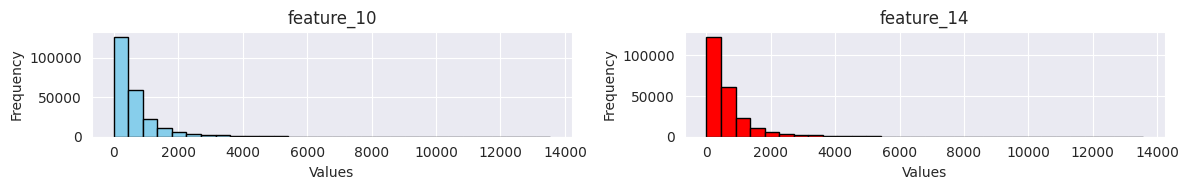

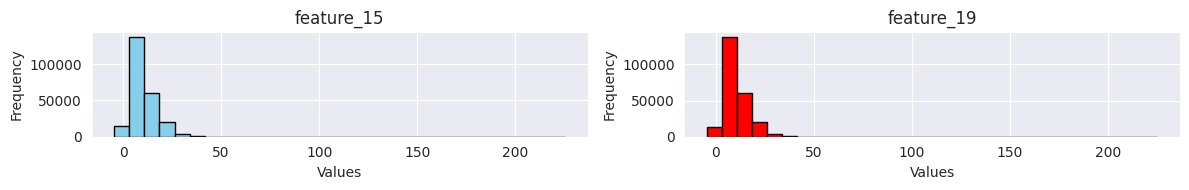

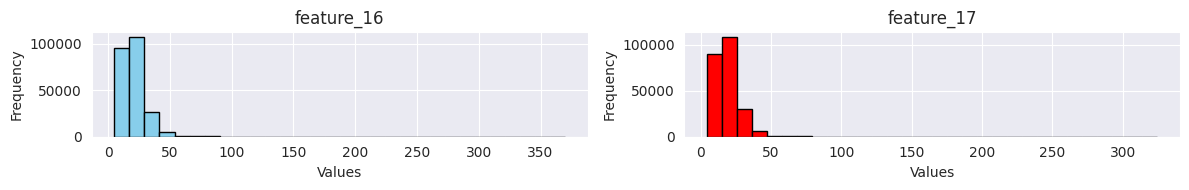

In [70]:
plot_feature_histograms(df, ["feature_10", "feature_14"])
plot_feature_histograms(df, ["feature_15", "feature_19"])
plot_feature_histograms(df, ["feature_16", "feature_17"])

In [71]:
describe[["feature_10", "feature_14", "feature_15", "feature_19", "feature_16", "feature_17"]]

,feature_10,feature_14,feature_15,feature_19,feature_16,feature_17
count,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000
mean,663.542035,681.401287,10.283856,10.269423,20.688222,18.649408
std,781.406049,788.301848,6.101613,6.096088,9.661968,8.932978
min,0.000000,2.000000,-4.387408,-4.412168,5.154618,4.361284
25%,207.000000,222.000000,6.191777,6.164914,14.528860,12.722823
50%,417.000000,434.000000,8.960286,8.934047,18.681153,17.213547
75%,799.000000,817.000000,13.052226,13.034525,25.347488,23.131053
max,13540.000000,13554.000000,225.367920,225.240281,369.782422,324.793461


С одной стороны хочется их конечно поудалять, но с другой - я не знаю, какая фича оригинал, а какая продублированна с шумом. 
С коэффицентом, по модулю, более 0.95 - 52 коллинеарные фичи, и странно будет просто удалять на глаз какие-то из них. Думаю попробовать применить метод понижения размерности, например PCA, и посмотреть, какие фичи будут иметь наибольшие веса в компонентах.

## 5) Sparsity
Есть колонки, где более 85% значений - нули. 

In [72]:
unique_counts = df.nunique().sort_values()
low_var_features = unique_counts[df[df == 0].count() > 200000]

low_var_features_df = pd.DataFrame({
    "Unique_Counts": low_var_features,
    "Zero_Counts": [df[feature][df[feature] == 0].count() for feature in low_var_features.index]
})
low_var_features_df

,Unique_Counts,Zero_Counts
feature_96,2,220724
feature_1,10,203021
feature_6,25,203021
feature_26,26,220724
feature_31,35,203021
feature_21,54,203021
feature_36,125,203021
feature_41,226,216070
feature_51,298,220724
feature_56,435,203021


In [73]:
df["query_id"].value_counts()

query_id
22540    908
13930    773
22450    522
19945    444
9940     430
        ... 
22780      2
14350      2
9265       1
20560      1
28285      1
Name: count, Length: 2000, dtype: int64

Что можно было бы сделать: 
Вообще у нас достаточно сильно варьируется количество документов в запросах - от 908 до 1. Возможно есть смысл разбить запросы на группы, в зависимости от их размера - вдруг все наши разряженные значения находятся, например, в запросах с небольшим числом документов, тогда можно было бы моделировать для них предсказания рангов отдельно.

Но эта идея уже пойдёт в todo, потому что с ней очень долго можно возиться, а мне еще модель обучать :) Поэтому просто посчитаем длину запроса и добавим это значение в качестве фичи.

In [74]:
# todo - add feature with query length

## Result

In [75]:
df.to_csv("data/cleaned_data.csv", index=False)

In [76]:
describe = df.describe()
correlation_matrix = df.corr()

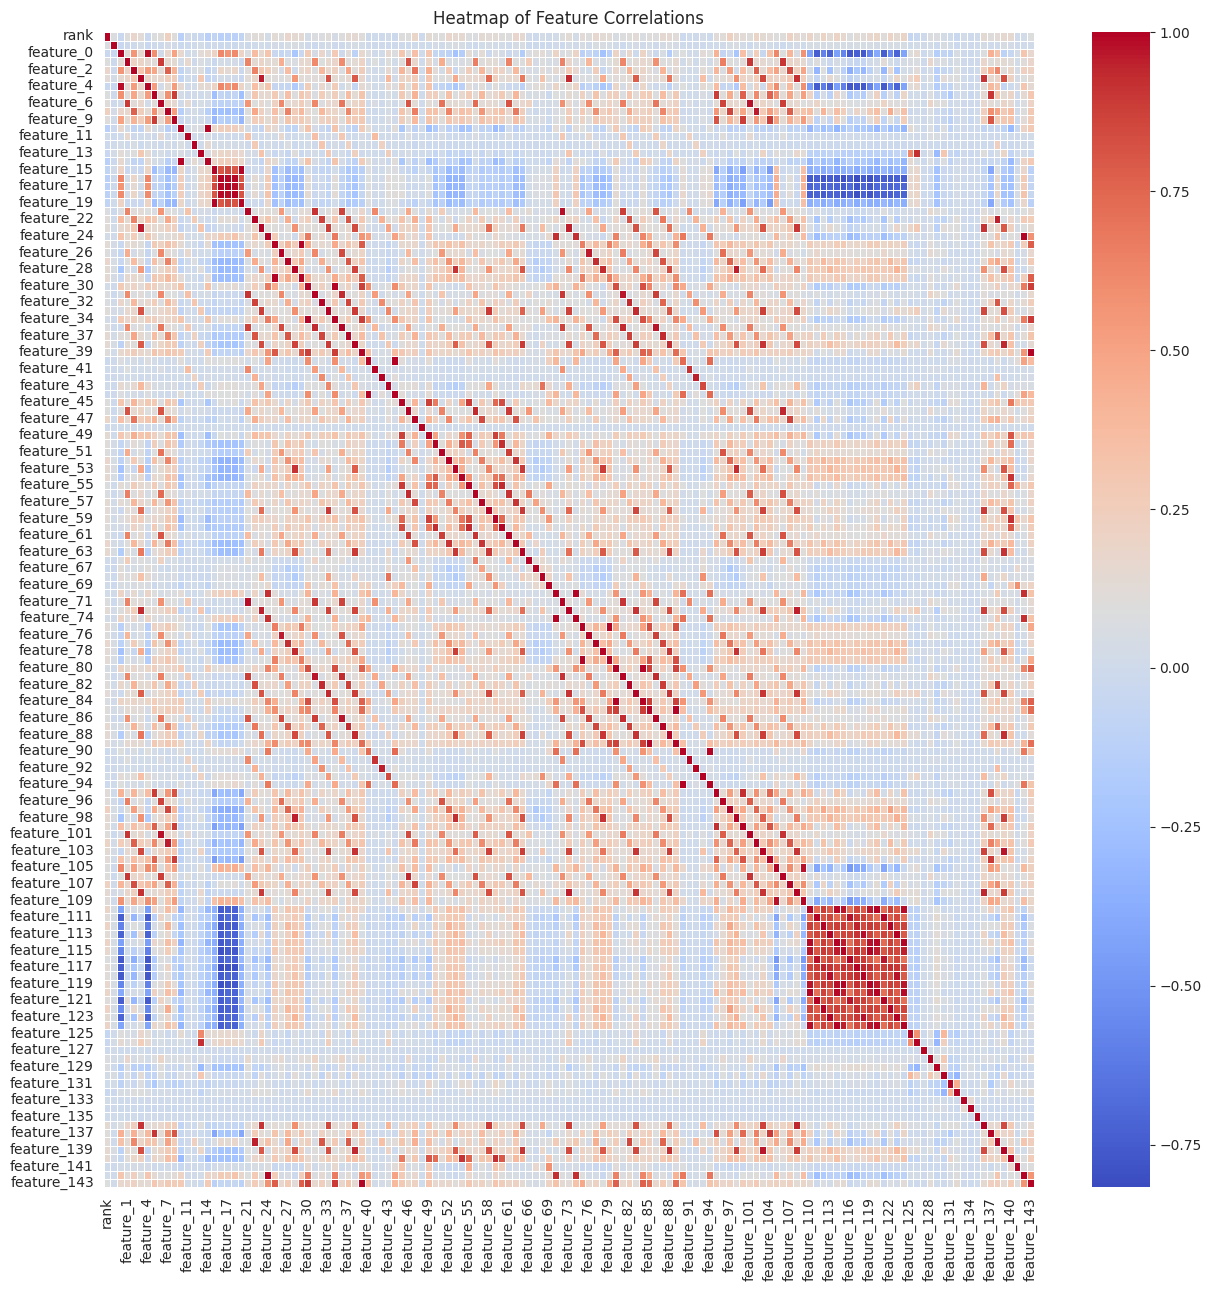

In [77]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".1f", linewidths=.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

In [78]:
describe

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
count,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,...,2.352580e+05,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000
mean,0.677869,14828.413401,1.911960,0.206233,1.189847,0.550272,1.960082,0.803964,0.097557,0.541174,...,4.763432e+02,1.046698e+04,0.070299,0.740710,11.067947,0.281747,0.027033,0.000269,22.457910,9.560379
std,0.830033,8193.945170,1.237374,0.579089,1.037233,0.790947,1.203534,0.339955,0.266035,0.419973,...,1.954840e+04,2.649584e+06,0.100721,0.352800,15.336861,0.392089,0.033351,0.002088,63.708018,14.347378
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8215.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.620522,0.000000,0.000000,0.006703,0.000000,4.000000,2.000000
50%,0.000000,14935.000000,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.500000,...,0.000000e+00,0.000000e+00,0.000000,0.926779,9.448900,0.000000,0.017761,0.000008,12.000000,5.500000
75%,1.000000,21580.000000,3.000000,0.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,...,1.000000e+00,4.000000e-01,0.142857,0.999613,16.146733,0.500000,0.034954,0.000109,28.000000,12.000000
max,4.000000,29995.000000,31.000000,18.000000,27.000000,9.000000,31.000000,1.000000,1.000000,1.000000,...,1.731553e+06,8.000000e+08,0.818182,1.000000,2506.799764,1.000000,0.711261,0.250000,15074.000000,1552.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235258 entries, 0 to 235257
Columns: 139 entries, rank to feature_143
dtypes: float64(137), int64(2)
memory usage: 249.5 MB
